# Exploratory Data Analysis


In [1]:
import numpy as np
import pandas as pd     
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns    
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_csv("latimes-county-totals.csv")

In [3]:
df.head()

,date,county,fips,confirmed_cases,deaths,new_confirmed_cases,new_deaths
0,2020-01-26,Alameda,1,0,0,NaN,NaN
1,2020-01-31,Alameda,1,0,0,0.0,0.0
2,2020-02-02,Alameda,1,0,0,0.0,0.0
3,2020-02-20,Alameda,1,0,0,0.0,0.0
4,2020-02-21,Alameda,1,0,0,0.0,0.0


In [4]:
df.describe()

,fips,confirmed_cases,deaths,new_confirmed_cases,new_deaths
count,2485.000000,2485.000000,2485.000000,2432.000000,2432.000000
mean,59.756539,229.698189,6.879276,15.485197,0.591283
std,32.786933,974.019813,37.795395,70.478349,3.502466
min,1.000000,0.000000,0.000000,-2.000000,0.000000
25%,31.000000,2.000000,0.000000,0.000000,0.000000
50%,65.000000,14.000000,0.000000,1.000000,0.000000
75%,85.000000,101.000000,2.000000,7.000000,0.000000
max,115.000000,16449.000000,732.000000,1474.000000,76.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485 entries, 0 to 2484
Data columns (total 7 columns):
date                   2485 non-null object
county                 2485 non-null object
fips                   2485 non-null int64
confirmed_cases        2485 non-null int64
deaths                 2485 non-null int64
new_confirmed_cases    2432 non-null float64
new_deaths             2432 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 136.0+ KB


In [6]:
df2 = df.copy(deep=True)
df_la = df2[df2['county'] == 'Los Angeles']

In [7]:
print(df_la)

           date       county  fips  confirmed_cases  deaths  \
657  2020-01-26  Los Angeles    37                1       0   
658  2020-01-27  Los Angeles    37                1       0   
659  2020-01-28  Los Angeles    37                1       0   
660  2020-01-29  Los Angeles    37                1       0   
661  2020-01-30  Los Angeles    37                1       0   
..          ...          ...   ...              ...     ...   
740  2020-04-18  Los Angeles    37            12051     577   
741  2020-04-19  Los Angeles    37            12349     601   
742  2020-04-20  Los Angeles    37            13823     619   
743  2020-04-21  Los Angeles    37            15165     666   
744  2020-04-22  Los Angeles    37            16449     732   

     new_confirmed_cases  new_deaths  
657                  NaN         NaN  
658                  0.0         0.0  
659                  0.0         0.0  
660                  0.0         0.0  
661                  0.0         0.0  
..       

In [8]:
days = list(range(1,len(df_la)+1))
len(days)

88

In [12]:
df_la['culm_day'] = days
print(df_la)

           date       county  fips  confirmed_cases  deaths  \
657  2020-01-26  Los Angeles    37                1       0   
658  2020-01-27  Los Angeles    37                1       0   
659  2020-01-28  Los Angeles    37                1       0   
660  2020-01-29  Los Angeles    37                1       0   
661  2020-01-30  Los Angeles    37                1       0   
..          ...          ...   ...              ...     ...   
740  2020-04-18  Los Angeles    37            12051     577   
741  2020-04-19  Los Angeles    37            12349     601   
742  2020-04-20  Los Angeles    37            13823     619   
743  2020-04-21  Los Angeles    37            15165     666   
744  2020-04-22  Los Angeles    37            16449     732   

     new_confirmed_cases  new_deaths  culm_day  
657                  NaN         NaN         1  
658                  0.0         0.0         2  
659                  0.0         0.0         3  
660                  0.0         0.0         4 

/Users/nancyzhu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df_la.columns

Index(['date', 'county', 'fips', 'confirmed_cases', 'deaths',
       'new_confirmed_cases', 'new_deaths', 'culm_day'],
      dtype='object')

In [14]:
df_la = df_la.drop(labels=['fips'], axis=1)
print (df_la.info())
df_la.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 657 to 744
Data columns (total 7 columns):
date                   88 non-null object
county                 88 non-null object
confirmed_cases        88 non-null int64
deaths                 88 non-null int64
new_confirmed_cases    87 non-null float64
new_deaths             87 non-null float64
culm_day               88 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.5+ KB
None


,confirmed_cases,deaths,new_confirmed_cases,new_deaths,culm_day
count,88.000000,88.000000,87.000000,87.000000,88.000000
mean,2471.238636,85.931818,189.057471,8.413793,44.500000
std,4276.841374,175.960144,310.491559,15.787507,25.547342
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,22.750000
50%,19.500000,0.000000,5.000000,0.000000,44.500000
75%,3159.750000,57.000000,347.000000,11.000000,66.250000
max,16449.000000,732.000000,1474.000000,76.000000,88.000000


In [15]:
print(df_la)

           date       county  confirmed_cases  deaths  new_confirmed_cases  \
657  2020-01-26  Los Angeles                1       0                  NaN   
658  2020-01-27  Los Angeles                1       0                  0.0   
659  2020-01-28  Los Angeles                1       0                  0.0   
660  2020-01-29  Los Angeles                1       0                  0.0   
661  2020-01-30  Los Angeles                1       0                  0.0   
..          ...          ...              ...     ...                  ...   
740  2020-04-18  Los Angeles            12051     577                630.0   
741  2020-04-19  Los Angeles            12349     601                298.0   
742  2020-04-20  Los Angeles            13823     619               1474.0   
743  2020-04-21  Los Angeles            15165     666               1342.0   
744  2020-04-22  Los Angeles            16449     732               1284.0   

     new_deaths  culm_day  
657         NaN         1  
658    

In [16]:
df_la.dropna(inplace=True)

In [17]:
print(df_la)

           date       county  confirmed_cases  deaths  new_confirmed_cases  \
658  2020-01-27  Los Angeles                1       0                  0.0   
659  2020-01-28  Los Angeles                1       0                  0.0   
660  2020-01-29  Los Angeles                1       0                  0.0   
661  2020-01-30  Los Angeles                1       0                  0.0   
662  2020-01-31  Los Angeles                1       0                  0.0   
..          ...          ...              ...     ...                  ...   
740  2020-04-18  Los Angeles            12051     577                630.0   
741  2020-04-19  Los Angeles            12349     601                298.0   
742  2020-04-20  Los Angeles            13823     619               1474.0   
743  2020-04-21  Los Angeles            15165     666               1342.0   
744  2020-04-22  Los Angeles            16449     732               1284.0   

     new_deaths  culm_day  
658         0.0         2  
659    

In [18]:
df_la.corr(min_periods=1)

,confirmed_cases,deaths,new_confirmed_cases,new_deaths,culm_day
confirmed_cases,1.000000,0.972570,0.871168,0.922288,0.781567
deaths,0.972570,1.000000,0.819575,0.908845,0.702718
new_confirmed_cases,0.871168,0.819575,1.000000,0.769025,0.750716
new_deaths,0.922288,0.908845,0.769025,1.000000,0.718661
culm_day,0.781567,0.702718,0.750716,0.718661,1.000000


In [20]:
%matplotlib inline

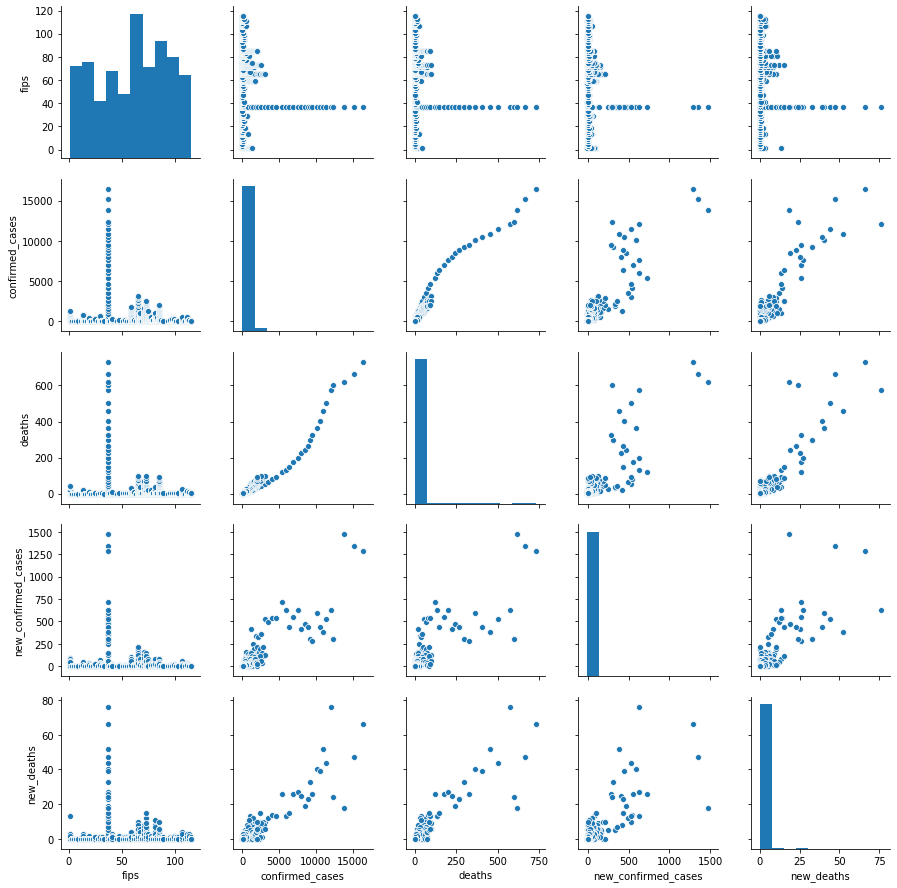

In [35]:
#With all counties
plot_df = df.dropna()
sns.pairplot(plot_df)

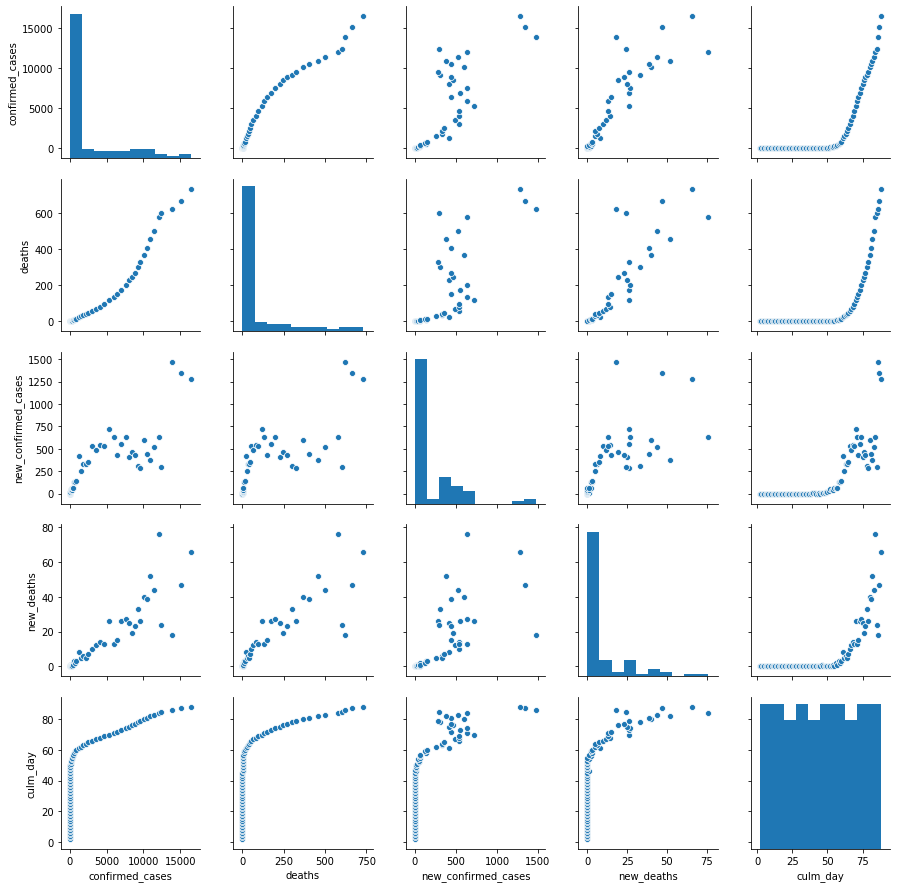

In [21]:
#only Los Angeles
plot_df_la = df_la.dropna()
sns.pairplot(plot_df_la)

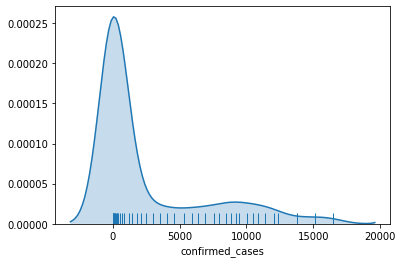

In [23]:
sns.distplot(df_la['confirmed_cases'], hist=False,rug=True, kde_kws={'shade':True})

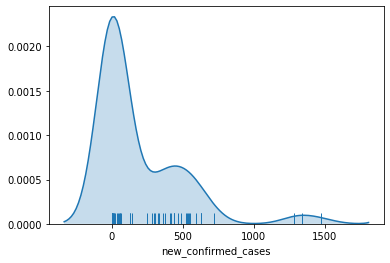

In [25]:
sns.distplot(df_la['new_confirmed_cases'], hist=False,rug=True, kde_kws={'shade':True})

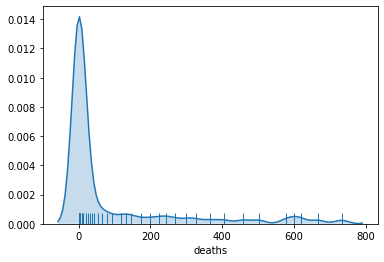

In [26]:
sns.distplot(df_la['deaths'], hist=False,rug=True, kde_kws={'shade':True})

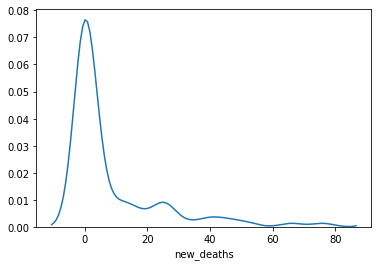

In [28]:
sns.distplot(df_la['new_deaths'], hist=False)

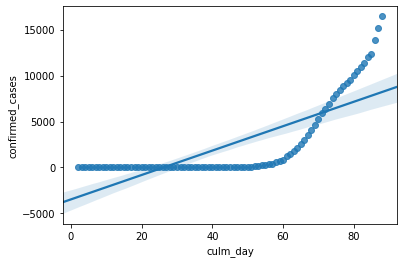

In [29]:
sns.regplot(x="culm_day", y="confirmed_cases", data=df_la)

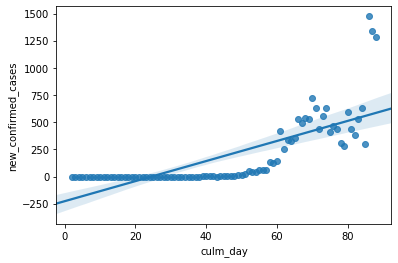

In [30]:
sns.regplot(x="culm_day", y="new_confirmed_cases", data=df_la)

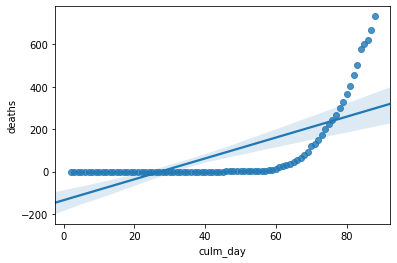

In [31]:
sns.regplot(x="culm_day", y="deaths", data=df_la)

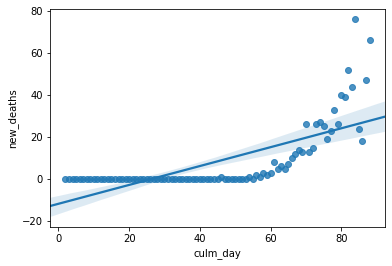

In [32]:
sns.regplot(x="culm_day", y="new_deaths", data=df_la)

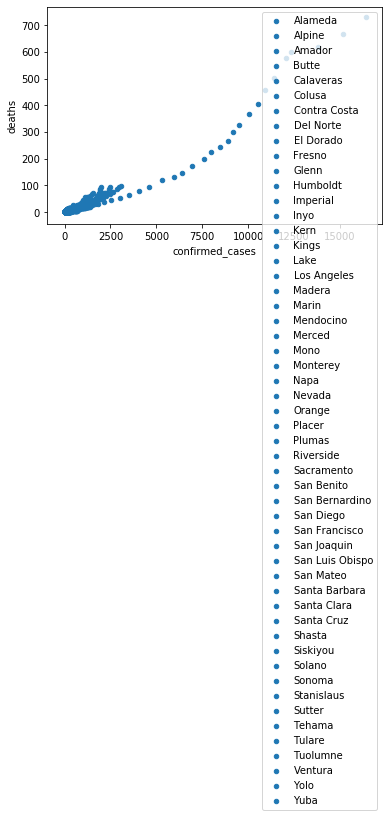

In [38]:
fig, ax = plt.subplots()
grouped = plot_df.groupby('county')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='confirmed_cases', y='deaths', label=key)
plt.show()